In [1]:
import re
import pandas as pd
import collections
import numpy as np

import plotly.graph_objects as go
import string

## Exercise 1

Read in a bunch of tweets that were collected during the airing of the 'Red Wedding' episode of Game of Thrones from the file `got_tweets.csv`.

Parse all the hashtags out of the texts, then count their overall occurrences. What are the 10 most common hashtags? Make a bar chart of these top 10 hashtags! Create a plot of hashtag timelines for the most interesting and frequent hashtags!

In [2]:
got = pd.read_csv("got_tweets.csv")
got.head()

id      created_at  created_at_shift       from_user  \
0  3.416120e+17  6/3/2013 18:45                 0  TheMadamEditor   
1  3.416120e+17  6/3/2013 18:45                 0      nitaselimi   
2  3.416120e+17  6/3/2013 18:45                 0    dh_editorial   
3  3.416120e+17  6/3/2013 18:45                 0        theprint   
4  3.416120e+17  6/3/2013 18:45                 0      Mr_Twenty2   

   from_user_id  from_user_id_str       from_user_name        id_str  \
0     337689639         337689639         madam-editor  3.416120e+17   
1     421347539         421347539          Nita Selimi  3.416120e+17   
2     256671039         256671039  Dee @ EditorialEyes  3.416120e+17   
3        809334            809334     Rasmus Rasmussen  3.416120e+17   
4      69222052          69222052           Marty Caan  3.416120e+17   

   in_reply_to_status_id  in_reply_to_status_id_str  ...  \
0                    NaN                        NaN  ...   
1           3.416110e+17               3.416110e+17  ...   
2                    NaN                        NaN  ...   
3                    NaN                        NaN  ...   
4                    NaN                        NaN  ...   

                                   profile_image_url  \
0  http://a0.twimg.com/profile_images/1448601184/...   
1  http://a0.twimg.com/profile_images/3570330661/...   
2  http://a0.twimg.com/profile_images/1252656506/...   
3  http://a0.twimg.com/profile_images/1469678734/...   
4  http://a0.twimg.com/profile_images/1492961144/...   

                             profile_image_url_https           query  \
0  https://si0.twimg.com/profile_images/144860118...  #gameofthrones   
1  https://si0.twimg.com/profile_images/357033066...  #gameofthrones   
2  https://si0.twimg.com/profile_images/125265650...  #gameofthrones   
3  https://si0.twimg.com/profile_images/146967873...  #gameofthrones   
4  https://si0.twimg.com/profile_images/149296114...  #gameofthrones   

                                              source  \
0  <a href="http://twitter.com/download/iphone">T...   
1  <a href="http://twitter.com/download/android">...   
2              <a href="http://twitter.com/">web</a>   
3   <a href="http://www.tweetdeck.com">TweetDeck</a>   
4              <a href="http://twitter.com/">web</a>   

                                                text   to_user  to_user_id  \
0    About to watch #GameOfThrones and I am tweaked.       NaN         NaN   
1  @Grangjii gjith e kom dasht, veq ti je tu ma s...  Grangjii  45957016.0   
2  Are there, like, House Stark/Tony Stark mashup...       NaN         NaN   
3  Reading #GameOfThrones reactions after last ni...       NaN         NaN   
4  I don't know if I'm impressed or disgusted! Br...       NaN         NaN   

  to_user_id_str     to_user_name type  
0            NaN              NaN  NaN  
1     45957016.0  Granit Gjevukaj  NaN  
2            NaN              NaN  NaN  
3            NaN              NaN  NaN  
4            NaN              NaN  NaN  

[5 rows x 25 columns]

In [3]:
#Parsing hashtags
flatten = lambda t: [item for sublist in t for item in sublist]

#Make all str lowercase
got_lc = got.text.str.lower()

#removing all punctuations other than #s
for s in string.punctuation.replace("#",""): 
    got_lc = got_lc.str.replace(s,"")

    
#find all words starting with a hashtag
HASHTAGS = got_lc.str.findall(r'#.*?(?=\s|$)')

In [4]:
#Counting hashtag occurrances
pd.Series(flatten(HASHTAGS)).value_counts()[:10]

#gameofthrones          15303
#redwedding              4245
#got                     2185
#therainsofcastamere      320
#rainsofcastamere         166
#getglue                  143
#wtf                      104
#theredwedding             74
#hbo                       70
#robbstark                 66
dtype: int64

In [5]:
#Barchart of hashtags
cntr = collections.Counter( flatten(HASHTAGS))
ht, cnt = zip( *cntr.items() )


fig = go.Figure([go.Bar(x=ht, y=cnt)])
fig.update_yaxes(type="log")

fig.update_traces(marker_line_color='rgb(108,48,107)',
                  marker_line_width=0.5, opacity=0.6)

fig.update_layout(title="Barchart of hashtags",
                  yaxis_title="word frequency",)

fig.show()

In [6]:
#Hashtag timeline

#Linking the list of hashtags to dates
ht_df = pd.DataFrame([HASHTAGS, got.created_at]).T


timeline_list = []

#take every word in every list and link it with a datetime in a dict
for row in ht_df.index:
    for word in ht_df.loc[row].text:
        timeline_list.append({"text": word, "created_at": ht_df.loc[row].created_at})

timeline_df = pd.DataFrame(timeline_list, columns = ["text", "created_at"])
timeline_df

text      created_at
0        #gameofthrones  6/3/2013 18:45
1        #gameofthrones  6/3/2013 18:45
2        #gameofthrones  6/3/2013 18:45
3              #ironman  6/3/2013 18:45
4        #gameofthrones  6/3/2013 18:45
...                 ...             ...
27726  #thingsidontknow  6/3/2013 22:28
27727      #massivegeek  6/3/2013 22:28
27728             #boom  6/3/2013 22:28
27729              #got  6/3/2013 22:28
27730          #getglue  6/3/2013 22:28

[27731 rows x 2 columns]

In [7]:
#The number of distinct hashtags:
len(ht)
#It would be wasteful to try to plot all 2570 hashtags' timelines. 

2570

In [8]:
# Instead if plotting all hashtags' timelines, I decided to plot only those which occur more than 50 times.
sum(np.array(cnt) > 50)

12

In [9]:
relevant_ht= np.array(ht)[(np.array(cnt) > 50)] #These are the hashtags which deemed to be relevant
print(relevant_ht)

['#gameofthrones' '#got' '#wtf' '#therainsofcastamere' '#getglue' '#hbo'
 '#redwedding' '#spoileralert' '#robbstark' '#rainsofcastamere' '#shocked'
 '#theredwedding']


In [10]:
#Filter the df by the relevant hashtags
timeline_df = timeline_df[timeline_df.text.isin(relevant_ht)]
timeline_df["created_at"] = pd.to_datetime(timeline_df["created_at"])
timeline_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text          created_at
0      #gameofthrones 2013-06-03 18:45:00
1      #gameofthrones 2013-06-03 18:45:00
2      #gameofthrones 2013-06-03 18:45:00
4      #gameofthrones 2013-06-03 18:45:00
5                #got 2013-06-03 18:45:00
...               ...                 ...
27714            #got 2013-06-03 22:28:00
27721            #got 2013-06-03 22:28:00
27723            #got 2013-06-03 22:28:00
27729            #got 2013-06-03 22:28:00
27730        #getglue 2013-06-03 22:28:00

[22781 rows x 2 columns]

In [11]:
timeline_df

text          created_at
0      #gameofthrones 2013-06-03 18:45:00
1      #gameofthrones 2013-06-03 18:45:00
2      #gameofthrones 2013-06-03 18:45:00
4      #gameofthrones 2013-06-03 18:45:00
5                #got 2013-06-03 18:45:00
...               ...                 ...
27714            #got 2013-06-03 22:28:00
27721            #got 2013-06-03 22:28:00
27723            #got 2013-06-03 22:28:00
27729            #got 2013-06-03 22:28:00
27730        #getglue 2013-06-03 22:28:00

[22781 rows x 2 columns]

In [12]:
timeline_gb = timeline_df.groupby(["text","created_at"]).size()
timeline_gb #It is a multiindexed dataframe, where the indeces are the hashtags and the datetimes, and the values are the columns

text            created_at         
#gameofthrones  2013-06-03 16:40:00    3
                2013-06-03 16:41:00    5
                2013-06-03 16:42:00    1
                2013-06-03 16:43:00    1
                2013-06-03 16:44:00    3
                                      ..
#wtf            2013-06-03 22:23:00    3
                2013-06-03 22:24:00    4
                2013-06-03 22:25:00    1
                2013-06-03 22:26:00    1
                2013-06-03 22:27:00    3
Length: 1411, dtype: int64

In [13]:
fig = go.Figure()
for word in ht:
    
    subdf = timeline_gb[timeline_gb.index.get_level_values('text') == word]
    
    occ_by_time = subdf.values
    t = subdf.index.get_level_values(1)
    #sorted_occ = [occ for _,occ in sorted(zip(t,occ_by_time))] 
    #without it the plot would be messy - sometimes data is not sorted
    fig.add_trace(go.Scatter(x=t, y=occ_by_time, name= word))
    
fig.update_layout(title="Hashtag timeline",
                  yaxis_title="word occurrence",)
fig.show()

On the graph above, we can see that the most frequent tweet was (obviously) `#gameofthrones`. By turning it off on the plot, there is a much more meaningful graph. <br>Firstly, I'd like to point out that there are huge gaps between 19:00-19:37 and 21:08-21:30.  <br>Secondly, after 21:50 the number of hashtags is increasing. It might suggest, that there would have been an important part in the episode which led many people to share their experience about it, or it might mean that the show ended at that time. The latter is more probable, because the `#getglue` hashtag also increased during that time, which was a was a social networking website where users could check in that they watched a movie.

## Exercise 2

Tokenize the text of the tweets, and gather the 'real' words for each tweet.

By 'real' words, there should be:

* hashtags only without `#` mark
* no user mentions
* no URLs
* no emojis
* no numbers
* no punctuations

Count word occurrences, make a histogram of the occurrences. What are the top words? Are they what you expected?

What crazy words did you get? Explain possible approaches, with which you could throw out this kind of junk text as well.

In [14]:
got2 = got.copy(deep = True) #making a deep copy, so it works independently

#Remove URLs
print("Before:\n",got2.text[5])
print("Num of http:", got2.text.map(lambda x: "http" in x).sum())


got2["text"] = got2["text"].map( lambda x: re.sub(r'http\S+', '', x) )
print("\nAfter:\n",got2.text[5])
print("Num of http:",got2.text.map(lambda x: "http" in x).sum())
print("Num of https:",got2.text.map(lambda x: "https" in x).sum())

Before:
 RT @CleverDever: '@SaschaRosemann: So sad and so true... #GameofThrones http://t.co/sKQH4GpTqB' *spoiler*  But laughing through my tears.  Cc: @brunogunn
Num of http: 3909

After:
 RT @CleverDever: '@SaschaRosemann: So sad and so true... #GameofThrones  *spoiler*  But laughing through my tears.  Cc: @brunogunn
Num of http: 0
Num of https: 0


In [15]:
#Remove #s
print("Before:\n",got2.text[0])
got2["text"] = got2.text.str.replace("#","")
print("After:\n",got2.text[0])

Before:
 About to watch #GameOfThrones and I am tweaked.
After:
 About to watch GameOfThrones and I am tweaked.


In [16]:
#Remove @UserMentions
print("Before:\n",got2.text[5])
got2["text"] = got2.text.map( lambda x: re.sub("@\S+","",x) )
print("\nAfter:\n",got2.text[5])

Before:
 RT @CleverDever: '@SaschaRosemann: So sad and so true... GameofThrones  *spoiler*  But laughing through my tears.  Cc: @brunogunn

After:
 RT  ' So sad and so true... GameofThrones  *spoiler*  But laughing through my tears.  Cc: 


In [17]:
#Remove emojis, from https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

got2["text"] = got2.text.map(deEmojify)

In [18]:
#remove punctiations
for s in string.punctuation.replace("#",""): 
    got2["text"] = got2.text.str.replace(s,"")

In [19]:
#Remove numbers
print("Before: ",got2.text.map(lambda x: any( d in x for d in string.digits) ).sum())
for d in string.digits: 
    got2["text"] = got2.text.str.replace(d,"")
print("After: ",got2.text.map(lambda x: any( d in x for d in string.digits) ).sum())

Before:  4746
After:  0


In [20]:
#make lowercase
got2["text"] = got2.text.str.lower()
TWEET_WORDS = flatten(got2.text.str.split(" ").to_list())

TWEET_WORDS = list(filter(lambda a: a != "", TWEET_WORDS)) # remove "" character

In [21]:
# histogram of words
cntr = collections.Counter( TWEET_WORDS )
ht, cnt = zip( *cntr.most_common())


fig = go.Figure([go.Bar(x=ht, y=cnt)])
fig.update_yaxes(type="log")

fig.update_traces(marker_line_color='rgb(108,48,107)',
                  marker_line_width=0.5, opacity=0.6)

fig.update_layout(title="Barchart of tweeted words",
                  yaxis_title="word frequency",)

fig.show()

In [22]:
cntr.most_common(30) #30 Most common words in the tweets.

[('gameofthrones', 15170),
 ('of', 14496),
 ('game', 10569),
 ('thrones', 10237),
 ('the', 10177),
 ('rt', 7532),
 ('i', 7150),
 ('to', 5000),
 ('a', 4433),
 ('redwedding', 4227),
 ('that', 3526),
 ('in', 3311),
 ('just', 3122),
 ('was', 3106),
 ('what', 2975),
 ('episode', 2953),
 ('is', 2758),
 ('got', 2640),
 ('and', 2609),
 ('it', 2457),
 ('my', 2382),
 ('you', 2349),
 ('for', 2209),
 ('all', 2133),
 ('this', 1935),
 ('on', 1856),
 ('last', 1817),
 ('im', 1807),
 ('me', 1677),
 ('de', 1673)]

As it can be seen above, that the most common words in these tweets were either closely related to the Game of Thrones show (its name or the name of the episode) or were stopwords.

## Exercise 3


Extract the stopword list for the English language with the help of `nltk`. Download the standard Brown Corpus also from `nltk`, count the relative frequency of stopwords in both the Brown Corpus and the GoT tweets. Make a scatterplot of your results, try to explain possible similarities and deviations. What is the correlation in the stopword frequencies of the two datasets?

In [23]:
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords
en_stop = stopwords.words('english') # English stopwords
print(en_stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
#nltk.download("brown")
from nltk.corpus import brown
len(brown.words())

1161192

In [25]:
#Filtering the corpora, so that counting the stopwords is faster
def filterStopword(word):
    if word in en_stop:
        return True
    else:
        return False

filtered_got = list(filter(filterStopword, TWEET_WORDS))
filtered_brown = list(filter(filterStopword, brown.words()))

In [26]:
#Comparison of frequencies of stopwords
cntr = collections.Counter( filtered_got )
ht_got, cnt_got = zip( *cntr.most_common())

cntr = collections.Counter( filtered_brown )
ht_brown, cnt_brown = zip( *cntr.most_common())

fig = go.Figure()

fig.add_trace(go.Bar(go.Bar(x=ht_got, y=cnt_got, name ="GoT corpus")))
fig.add_trace(go.Bar(go.Bar(x=ht_brown, y=cnt_brown, name = "Brown corpus")))
fig.update_yaxes(type="log")
fig.update_layout(title="Comparison of frequencies of stopwords",
                  yaxis_title="word frequency",)

It is quite apparent, that the both corpora has very similar distribution of stopwords because of the nature of the English language. Other than that, I claim there are two major differences between them. <br>
Firstly, the GoT corpus has a lot more of the abbreviated stopword fragments (such as I'<b>m</b> instead of <i>I am</i>, they'<b>d</b> instead of <i>they had</i>), which left behind after removing punctuations. On the other hand, the Brown corpus still has.

## Exercise 4

A really common tool to visualize texts is a wordcloud. Find a suitable library and create a meaningful wordcloud of the GoT tweets (e.g. leave out punctuation, stopwords etc.)

In [27]:
#!pip install wordcloud

In [28]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [29]:
#filtering out stopwords
def filterOutStopword(word):
    if word in en_stop:
        return False
    else:
        return True

got_wo_stopwords = list(filter(filterOutStopword, TWEET_WORDS))

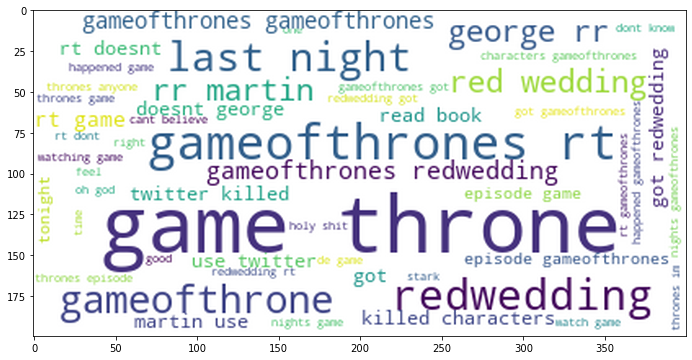

In [30]:
plt.figure(figsize=[12,6])
#generating the wordcloud, giving additional parameters
wordcloud = WordCloud(max_font_size=50, min_font_size=6, max_words=100, background_color="white")
wordcloud.generate(" ".join(got_wo_stopwords))

plt.imshow(wordcloud, interpolation="spline36")

In [31]:
# I feel the need of removing some of the redundant words (such as game of thrones) from the cloud, 
#because it has no additional meaning
specific_sws = ["throne","thrones",  "game", "gameofthrone", "gameofthrones", "got"]
for w in specific_sws:
    STOPWORDS.add(w)

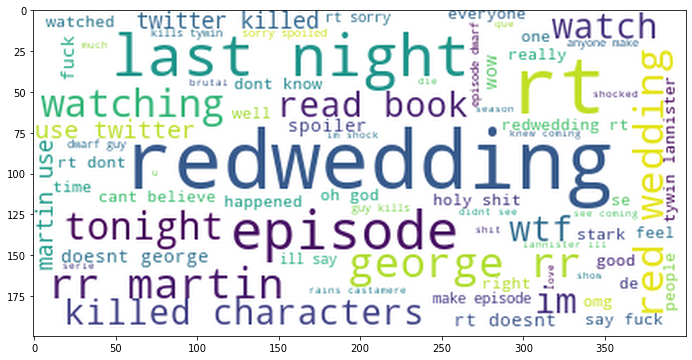

In [32]:
plt.figure(figsize=[12,6])
wordcloud = WordCloud(max_font_size=50, min_font_size=6, max_words=100, background_color="white", stopwords = STOPWORDS)
wordcloud.generate(" ".join(got_wo_stopwords))
plt.imshow(wordcloud, interpolation="lanczos")

In [33]:
mask = np.array(Image.open("got-head.png"))[:,:,3] #omitting the 3 additional channels - it is a monochrome picture
mask2 = np.array(Image.open("throne.png"))[:,:,3]

#change 0 to 255
def transform_format(val):
    return 255 - val
    
tf_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int16)
tf_mask2 = np.ndarray((mask2.shape[0],mask2.shape[1]), np.int16)

for i in range(len(mask)):
    tf_mask[i] = list(map(transform_format, mask[i]))
for i in range(len(mask2)):
    tf_mask2[i] = list(map(transform_format, mask2[i]))

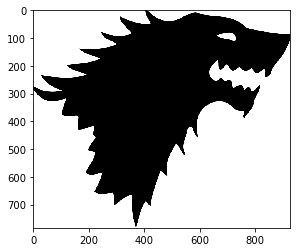

In [34]:
plt.imshow(tf_mask, cmap = "gray")

(-0.5, 376.5, 497.5, -0.5)

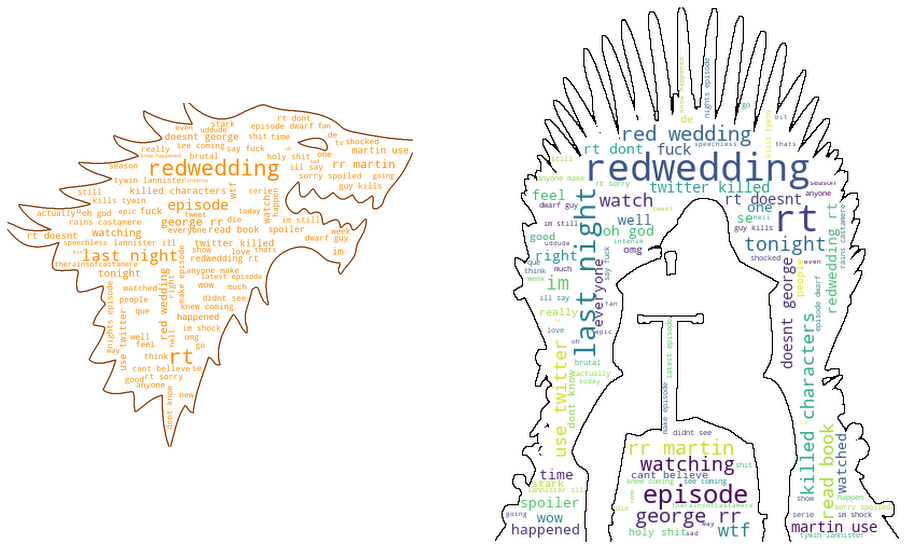

In [35]:
plt.figure(figsize=[16,14])
wc = WordCloud(max_font_size=50, min_font_size=6, max_words=100, background_color="white",
               color_func=lambda *args, **kwargs: "darkorange", 
               mask = tf_mask, contour_width=3, contour_color='saddlebrown').generate(" ".join(got_wo_stopwords))

wc2 = WordCloud(max_font_size=50, min_font_size=6, max_words=100, background_color="white",
               mask = tf_mask2, contour_width=1, contour_color='black').generate(" ".join(got_wo_stopwords))
plt.subplot(121)
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.subplot(122)
plt.imshow(wc2, interpolation = "lanczos")
plt.axis("off")

#The words are much more readable when written with different colors

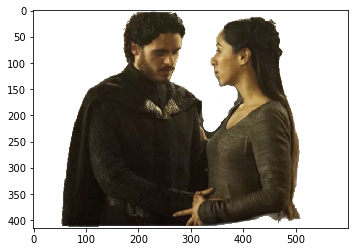

In [36]:
#I used this image to generate the last wordcloud
rw_cutout = np.array(Image.open("red_wedding_sc_cut2.png"))
plt.imshow(rw_cutout)

(-0.5, 599.5, 414.5, -0.5)

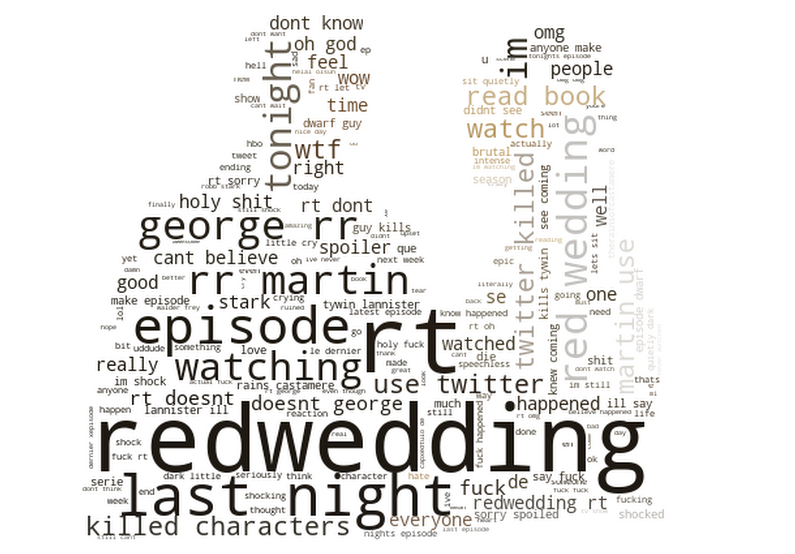

In [37]:
#And that's even better :D

wc3 = WordCloud(background_color='white', mask=rw_cutout, stopwords = STOPWORDS, min_font_size=1)
wc3.generate(" ".join(got_wo_stopwords))

#Recoloring the wordcloud
image_colors = ImageColorGenerator(rw_cutout)
wc3.recolor(color_func=image_colors)

plt.figure(figsize=[14,10])
plt.imshow(wc3, interpolation = "lanczos")
plt.axis('off')

I  followed [this guide](https://towardsdatascience.com/generate-word-clouds-of-any-shape-in-python-e87f265f6352) to generate these figures.
<br>
We could draw a general conclusion with the help of this visualization, that the viewers were quite shocked by the twists this episode caused in the plot of the Game of Thrones. This is supported by the high frequency of the strong words used in the tweets (swear words, kill, hate, speechless, shocked etc.).

## Exercise 5

Define a time window in which all tweets count as one document. Create the term-document matrix of the tweets for this time segmentation. Apply stemming and stopword filtering.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer

In [39]:
c = CountVectorizer()

In [40]:
#Filtering stopwords
for w in specific_sws:
    en_stop.append(w)
got2["text"] = got2.text.map( lambda x: " ".join(list(filter(filterOutStopword, x.split(" ")))))

In [41]:
#import nltk
#nltk.download('punkt')

In [42]:
got2.text

0                                            watch tweaked
1         gjith e kom dasht veq ti je tu shti nqef edhe...
2               like house starktony stark mashups ironman
3        reading reactions last nights episode hilariou...
4        dont know im impressed disgusted brilliant non...
                               ...                        
27330          mins episode finished  taken feelings edges
27331                          actually fuming ha sad must
27332    rt  entirely possible twitter watched needed  ...
27333    rt  entirely possible twitter watched needed  ...
27334    rt  entirely possible twitter watched needed  ...
Name: text, Length: 27335, dtype: object

In [43]:
#Stemming tweets
snow = SnowballStemmer('english',ignore_stopwords=True)

got2.text = got2.text.map(lambda line: " ".join([snow.stem(word) for word in line.split(" ")]))

In [44]:
#I considered one document to be 1 minute in length, so I aggregated the tweets by the minute.

timeline2_df = pd.DataFrame(got2[["created_at","text"]].groupby("created_at")["text"].transform(" ".join).drop_duplicates())
timeline2_df["created_at"] = got2.loc[timeline2_df.index].created_at
timeline2_df = timeline2_df.set_index(np.arange(len(timeline2_df))) 
timeline2_df

text      created_at
0    watch tweak  gjith e kom dasht veq ti je tu sh...  6/3/2013 18:45
1    fukk yall talk bout fukk saw last night bullsh...  6/3/2013 18:44
2    think find fascin redwed see ppl respond reali...  6/3/2013 18:43
3    close yet far bran rick jon arya rob cat massa...  6/3/2013 18:42
4    emmi best scene caus redwed scene need win act...  6/3/2013 18:41
..                                                 ...             ...
287  post spoiler last night episod hope stub toe f...  6/3/2013 22:24
288  guy like thewalkingdead wecand uddudeuddudeudd...  6/3/2013 22:25
289  rt  doesnt georg rr martin use twitter   kill ...  6/3/2013 22:26
290  dont know handl rainsofcastamer point guess pl...  6/3/2013 22:27
291  fuck joffrey baratheon better get rape next we...  6/3/2013 22:28

[292 rows x 2 columns]

In [45]:
term_doc = pd.DataFrame(c.fit_transform(timeline2_df.text).toarray())

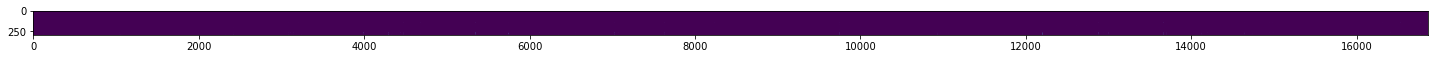

In [46]:
plt.figure(figsize=[25,160])
plt.imshow(term_doc) #It looks like, there's nothing to be seen, x axis is the document, y axis is the word

## Exercise 6

Apply a TF-IDF weighting scheme for the term-document matrix by hand (e.g. do not use a built-in vectorizer, but normalize by text length with a summation etc. `numpy` or `pandas` is strongly suggested). Then, choose a topic detection method such as LSI or LDA, and run it on your matrix. Try to interpret your results! Are your topics meaningful? Which topics are the most representative of your document?

In [73]:
#Calculating term frequency, showing it's normalized

#number of occurrance of the word in the document/ num of words in the document - on each word on each row

term_frequency = term_doc.divide( term_doc.sum(axis="columns"), axis="rows")
term_frequency.sum(axis="columns")

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
287    1.0
288    1.0
289    1.0
290    1.0
291    1.0
Length: 292, dtype: float64

In [74]:
# idf number of documents / number of documents containing the word
temp = np.zeros(len(term_doc.columns))

for i in range(len(temp)):
    temp[i] = sum(term_doc[i].map(lambda x: 1 if x > 0 else 0)) 
    
idf = np.log(len(term_doc) / temp)

In [75]:
tf_idf = term_frequency * idf

In [76]:
#LSA method: making SVD with the tf_idf, then taking the first n most significant vectors to score the documents

from sklearn.decomposition import TruncatedSVD
n_comp = 10
svd = TruncatedSVD(n_components = n_comp)
lsa = svd.fit_transform(tf_idf)

In [97]:
topic_encoded_df = pd.DataFrame(lsa, index = timeline2_df.created_at,
                                columns = [f"topic{i}" for i in range(n_comp)])
topic_encoded_df["text"] = timeline2_df.text

In [78]:
encoding_matrix = pd.DataFrame(svd.components_, 
                               index = [f"topic{i}" for i in range(n_comp)], 
                               columns = c.get_feature_names())

In [79]:
#Finding the most relevant words for each topic
top_by_topic = pd.DataFrame()
for col in encoding_matrix.index:
    topic_temp_df = pd.DataFrame(encoding_matrix.T.sort_values(col, axis = "rows", ascending = False, 
                                                               key = np.abs)[col][:15]).reset_index()
    topic_temp_df.columns = [col, col+"_value"]
    top_by_topic = pd.concat([top_by_topic, topic_temp_df], axis = 1)

In [80]:
top_by_topic

topic0  topic0_value                                             topic1  \
0    bitch      0.775206                                               wahh   
1      son      0.631296  uddudeuddudeuddudeuddudeuddudeuddudeuddudebudd...   
2      plz      0.002830                                morireeeeeeeeeeeeee   
3      deg      0.002776                                     martinihateyou   
4      yes      0.002456                                             voglio   
5     fuck      0.002217                                                rip   
6       im      0.002209                                 therainsofcastamer   
7    lloro      0.002071                                                 rt   
8       de      0.002033                                              river   
9      sos      0.001959                                              drown   
10   locoo      0.001959                                               fuck   
11  episod      0.001882                                            lannist   
12     wed      0.001785                                               knew   
13   seeth      0.001722                                               dont   
14  whatll      0.001721                                               send   

    topic1_value             topic2  topic2_value      topic3  topic3_value  \
0       0.469913               kasi      0.424305        hate      0.120001   
1       0.469913                wrf      0.424305        fuck      0.115967   
2       0.469913  jamaspasarademoda      0.424305    treacher      0.115438   
3       0.469913              naman      0.372540     lannist      0.110775   
4       0.308857             redund      0.372505      episod      0.104683   
5       0.124337          mindblown      0.218853          de      0.102672   
6       0.075259             anyway      0.200515         brb      0.100986   
7       0.008220              trust      0.188612       watch      0.100613   
8       0.001809              sorri      0.142792        like      0.094179   
9       0.001605              filch      0.136351        kill      0.092229   
10      0.001392              recov      0.116086          im      0.091800   
11      0.001379                 im      0.039134      happen      0.090446   
12      0.001244              still      0.027593  auniqueway      0.090098   
13      0.001203               fuck      0.007787        dont      0.089600   
14      0.001167             episod      0.006874         wed      0.086272   

        topic4  topic4_value              topic5  topic5_value  \
0     treacher      0.511965               river      0.566188   
1          brb      0.464973               drown      0.509465   
2       member      0.316064                send      0.288070   
3        forev      0.271319             horribl      0.265594   
4        theyr      0.261790              regard      0.238569   
5        mourn      0.229734              prepar      0.216688   
6         hate      0.225155             lannist      0.151709   
7       bolton      0.197128  therainsofcastamer      0.122818   
8         hous      0.185361                knew      0.112548   
9      lannist      0.105776                  go      0.097609   
10        frey      0.102067                come      0.085880   
11        like      0.057096                  de     -0.032198   
12        fuck     -0.035361               still      0.030984   
13  auniqueway     -0.032713              wtfgot      0.026418   
14      episod     -0.031144                 que     -0.025559   

            topic6  topic6_value       topic7  topic7_value            topic8  \
0              fck      0.291295   auniqueway      0.324779            approp   
1     spoileralert      0.278131       tumblr      0.234054             spray   
2           youtub      0.227623         cope      0.229773             stomp   
3            react      0.204500        laugh      0.191640  daggersinthedark   
4          l

If we want to interpert the encoding matrix, we can list out the words along with their absolute value. This value describes how much a word is characterizing a certain topic both in a negative or a positive way. This is very much like the correlation coefficient. 

First of all, I've experimented with 5-15 topics, but later decided to stick to 10. I've listed the 15 most significant word for each topic. Unfortunately, I couldn't find a way, to describe the topics in a meaningful way.

The best words for <b> Topic 5 </b> might be interesting, because the first 2 words are <i>river</i> and <i>drown</i>.

Some of the words seem to be gibberish or from another language. So, some topics might represent documents from a given language. But this approach is debatable, since one document contain multiple tweets, which might be written in different languages.

In [90]:
#Let's compare it with the sklearn library's tf-idf implementation
from sklearn.feature_extraction.text import TfidfVectorizer

n_comp = 10
svd2 = TruncatedSVD(n_components = n_comp)

tf_idf_sk = TfidfVectorizer(norm="l1")
X = tf_idf_sk.fit_transform(timeline2_df.text)

lsa2 = svd2.fit_transform(X)

topic_encoded_df = pd.DataFrame(lsa2, columns = [f"topic{i}" for i in range(n_comp)])

encoding_matrix2 = pd.DataFrame(svd2.components_, 
                               index = [f"topic{i}" for i in range(n_comp)], 
                               columns = tf_idf_sk.get_feature_names())

top_by_topic2 = pd.DataFrame()
for col in encoding_matrix2.index:
    topic_temp_df2 = pd.DataFrame(encoding_matrix2.T.sort_values(col, axis = "rows", ascending = False, 
                                                               key = np.abs)[col][:15]).reset_index()
    topic_temp_df2.columns = [col, col+"_value"]
    top_by_topic2 = pd.concat([top_by_topic2, topic_temp_df2], axis = 1)

In [91]:
top_by_topic2

topic0  topic0_value  topic1  topic1_value  \
0     redwed      0.819486   bitch      0.737966   
1         rt      0.205094     son      0.642792   
2       last      0.116705      rt     -0.079177   
3      watch      0.116596   watch     -0.044658   
4      night      0.112828    last     -0.043383   
5      bitch      0.106884   night     -0.041769   
6      still      0.099042  episod     -0.036901   
7     episod      0.096907   still     -0.034534   
8        son      0.094316  redwed     -0.033529   
9         im      0.087557      im     -0.029538   
10      book      0.080130    book     -0.027982   
11      read      0.075486    read     -0.026567   
12       wed      0.063849     wed     -0.023295   
13    happen      0.060376  happen     -0.022391   
14  reaction      0.059970    fuck     -0.021949   

                                               topic2  topic2_value  \
0                                      martinihateyou      0.418200   
1                                                wahh      0.418200   
2   uddudeuddudeuddudeuddudeuddudeuddudeuddudebudd...      0.418200   
3                                 morireeeeeeeeeeeeee      0.418200   
4                                              voglio      0.320994   
5                                                 rip      0.168463   
6                                              redwed      0.145824   
7                                  therainsofcastamer      0.142948   
8                                               watch     -0.090585   
9                                              episod     -0.081991   
10                                               last     -0.080826   
11                                              night     -0.078020   
12                                                 rt     -0.076513   
13                                               fuck     -0.060881   
14                                                wed     -0.046858   

               topic3  topic3_value    topic4  topic4_value  \
0                 wrf      0.237150  treacher      0.390338   
1                kasi      0.237150      hate      0.379624   
2   jamaspasarademoda      0.237150       brb      0.367258   
3                  rt     -0.229908    member      0.280660   
4              redund      0.220988     forev      0.252949   
5               naman      0.220717   lannist      0.248292   
6              redwed      0.194847     theyr      0.247624   
7               river      0.185561     mourn      0.227831   
8               drown      0.178010    bolton      0.210477   
9               recov      0.170098      hous      0.198256   
10          mindblown      0.153356      frey      0.158499   
11             anyway      0.142384      like      0.121780   
12              watch     -0.138689        rt      0.098293   
13              trust      0.137353     river      0.086421   
14               knew      0.132505     drown      0.082010   

                topic5  topic5_value             topic6  topic6_value  \
0                river      0.378580              watch     -0.207529   
1                drown      0.360800         auniqueway      0.189834   
2                 send      0.245245              river     -0.182625   
3              horribl      0.234348                 rt     -0.181256   
4               regard      0.219231                fck     -0.181042   
5                  wrf     -0.214823       spoileralert     -0.175615   
6                 kasi     -0.214823             redwed      0.170940   
7    jamaspasarademoda     -0.214823              drown     -0.169189   
8               prepar      0.209616                cri      0.165441   
9                naman     -0.200312               kasi     -0.160193   
10              redund     -0.200275                wrf     -0.160193   
11                knew      0.176333  jamaspasarademoda     -0.160193   
12  therainsofcastamer      0.157153             tumblr      0.152265   
13   

By using the `sci-kit learn`  library function we obtain a similar result: the grouping of the top words has a lot in common. Other than that, like in our solution from scratch, it doesn't seem to make too much sense to divide the corpora to topics with the use of these words.

## Exercise 7

Write an own name parser for the tweets, and consider all names that you find in the dataset as a node of a graph. Add 1 to the weight of an edge if two names occur in the same tweet. With the help of networkx, draw the weighted network of names from the text. Try to find a simple clustering algorithm in networkx, cluster the names in the dataset. Print or visualize your results!

## Exercise 8

This episode caused severe disappointments in many viewers, because of the sudden death of too many of the favourite characters. Search for some sentiment analysis method, and create a timeline of sentiments based on the tweet texts. Do the sentiments on Twitter reflect the time of the worst scene?